In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


In [3]:
class LinearRegression:
    """
    线性回归模型实现类

    两种求解方法：
        正规方程法 (normal equation)
        梯度下降法 (gradient descent)

    参数:
        method (str): 求解方法，可选 'normal' 或 'gradient_descent'
        times (int): 梯度下降迭代次数，默认1000
        learn_rate (float): 学习率，默认0.01
    """
    def __init__(self, method, times=1000, learn_rate=0.01):
        self.times = times
        self.learn_rate = learn_rate
        self.method = method
        self.means = None
        self.std = None
        self.theta = None

    def standardization(self, X):
        """
        特征标准化

        参数：
            X(np.array): 特征

        返回：
            np.array: 标准化后的特征
        """
        self.means = np.mean(X, axis=0) # 均值
        self.std = np.std(X, axis=0) # 标准差
        return (X - self.means) / self.std

    def normal_function(self, X, y):
        """
        正规方程求解

        参数:
            X(np.array): 特征
            y(np.array): 真实值

        返回:
            np.array: 模型参数
        """
        return np.linalg.inv(X.T @ X) @ X.T @ y

    def gradient_descent(self, X, y):
        """
        梯度下降求解

        参数：
            X(np.array): 特征
            y(np.array): 真实值

        返回:
            np.array: 模型参数
        """
        m = len(y)
        n = X.shape[1] # 得到列数
        theta = np.zeros((n, 1)) # 初始化参数
        for i in range(self.times): # 迭代
            theta = theta - self.learn_rate * (1 / m) * X.T @ (X @ theta - y)
        return theta

    def fit(self, X, y):
        """
        模型训练

        参数:
            X (np.array): 特征
            y (np.array): 真实值

        返回:
             np.array: 模型参数
        """
        X_std = self.standardization(X) # 数据标准化
        X_with_bias = np.c_[np.ones(X_std.shape[0]), X_std]
        if self.method == 'normal': # 正规方程
            self.theta = self.normal_function(X_with_bias, y)
        elif self.method == 'gradient_descent': # 梯度下降
            self.theta = self.gradient_descent(X_with_bias, y)
        return self.theta

    def predict(self, X):
        """
        预测

        参数:
            X (np.array): 特征

        返回:
             np.array: 预测值
        """
        X_std = self.standardization(X)
        X_with_bias = np.c_[np.ones(X_std.shape[0]), X_std] # 添加偏执项
        return X_with_bias @ self.theta

    def evaluate(self, X, y):
        """
        评估指标

        参数：
            X (np.array): 特征
            y (np.array): 真实值

        返回：
            dict: MAE,RMSE,R²
        """
        y_pred = self.predict(X)
        errors = y - y_pred # 误差
        mae = np.mean(np.abs(errors)) # 平均绝对误差计算公式
        rmse = np.sqrt(np.mean(errors ** 2)) # 均方根误差计算公式
        r2 = 1 - (np.sum(errors ** 2, axis=0) / np.sum((y - np.mean(y, axis=0)) ** 2, axis=0)) # 决定系数计算公式
        return {'mae': mae, 'rmse': rmse, 'r2': r2}

In [4]:
def split_train_test_valid(data, train_rate=0.6, test_rate=0.2, valid_rate=0.2, random_seed=42):
    """
    将数据集划分为训练集、测试集和验证集

    参数：
        data (DataFrame): 要划分的数据集
        train_rate (float): 训练集比例，默认0.6
        test_rate (float): 测试集比例，默认0.2
        valid_rate (float): 验证集比例，默认0.2
        random_seed (int): 随机种子，默认42

    返回：
         DataFrame: 训练集，预测集，验证集
    """
    random.seed(random_seed)

    idx = list(data.index)
    random.shuffle(idx)

    train_len = int(len(data) * train_rate)
    test_len = int(len(data) * test_rate)

    # 划分数据集
    data_train = data.loc[idx[:train_len]]
    data_test = data.loc[idx[train_len:train_len + test_len]]
    data_valid = data.loc[idx[train_len + test_len:]]

    return data_train, data_test, data_valid


In [5]:
# 导入数据
data = pd.read_csv('BostonHousing.csv')
cols = data.shape[1]

In [6]:
# 中文和负号显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [7]:
# 数据分析
print(f"数据规模：{data.shape}")
print(f"数据列名: {data.columns.tolist()}")
print(f"基础信息：\n{data.info}\n")
print(f"查看缺失：\n{data.isnull().sum()}\n")
print(f"描述性数据统计：\n{data.describe()}")

数据规模：(506, 14)
数据列名: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']
基础信息：
<bound method DataFrame.info of         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0 

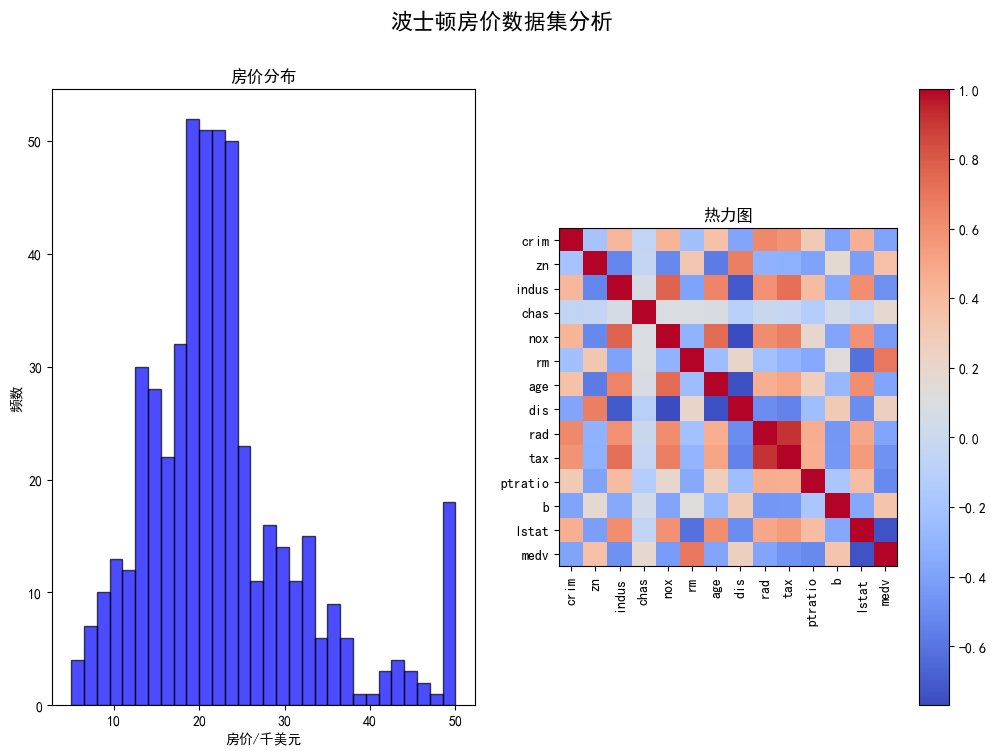

In [8]:
# 可视化
plt.figure(figsize=(12, 8))
plt.suptitle('波士顿房价数据集分析', fontsize=16)

# 房价分布频率分布直方图
plt.subplot(1, 2, 1)
plt.hist(data.iloc[:, -1], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('房价分布')
plt.xlabel('房价/千美元')
plt.ylabel('频数')

# 相关性热力图
plt.subplot(1, 2, 2)
correlation = data.corr()
im = plt.imshow(correlation, cmap='coolwarm')
plt.colorbar(im)
plt.title('热力图')
plt.xticks(range(len(data.columns)), data.columns, rotation=90)
plt.yticks(range(len(data.columns)), data.columns)

plt.show()

In [9]:
# 划分数据集
train_data, test_data, valid_data = split_train_test_valid(data)

# 训练集
X_train = train_data.iloc[:,:-1]
X_train = np.array(X_train.values)
y_train = train_data.iloc[:,cols-1:cols]
y_train = np.array(y_train.values)

# 测试集
X_test = test_data.iloc[:,:-1]
X_test = np.array(X_test.values)
y_test = test_data.iloc[:,cols-1:cols]
y_test = np.array(y_test.values)

# 验证集
X_valid = valid_data.iloc[:,:-1]
X_valid = np.array(X_valid.values)
y_valid = valid_data.iloc[:,cols-1:cols]
y_valid = np.array(y_valid.values)

In [10]:
# 正规方程模型
model_normal = LinearRegression(method='normal')
model_normal.fit(X_train, y_train)

# 梯度下降模型
model_gd = LinearRegression(method='gradient_descent')
model_gd.fit(X_train, y_train)

# 模型评估（误差计算）
normal_evaluate = model_normal.evaluate(X_test, y_test)
gd_evaluate = model_gd.evaluate(X_test, y_test)

print("正规方程法:")
print(f"MAE: {normal_evaluate['mae']}")
print(f"RMSE: {normal_evaluate['rmse']}")
print(f"R²: {normal_evaluate['r2'][0]}")
print("梯度下降法:")
print(f"MAE: {gd_evaluate['mae']}")
print(f"RMSE: {gd_evaluate['rmse']}")
print(f"R²: {gd_evaluate['r2'][0]}")

正规方程法:
MAE: 3.093788496513535
RMSE: 4.329236791079728
R²: 0.7892310589759748
梯度下降法:
MAE: 3.0735805447898614
RMSE: 4.385072667586618
R²: 0.7837592585514217
